In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0, "/notebooks/")
from fastai.imports import *

In [2]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
import pandas

In [4]:
PATH = "/notebooks/data/cars/"
IMG_PATH = "/notebooks/data/cars/cars_train/"
sz=224

In [5]:
label_csv = f'/notebooks/notebook/projects/cars/train.csv'

In [6]:
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [7]:
f_model = resnet34

In [8]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_basic, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'cars_train', label_csv, tfms=tfms, val_idxs=val_idxs)

In [9]:
data = get_data(224)

In [10]:
x,y = next(iter(data.val_dl))

In [11]:
len(y)

64

In [12]:
sz=224

In [13]:
data = get_data(sz)

In [14]:
learn = ConvLearner.pretrained(f_model, data)

In [15]:
lrf=learn.lr_find()

 97%|█████████▋| 99/102 [00:26<00:00,  3.72it/s, loss=13.1]

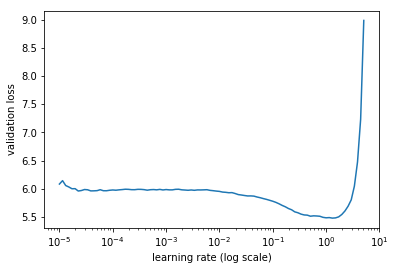

In [16]:
learn.sched.plot(n_skip=0, n_skip_end=0)

In [17]:
lr = 1e-1

In [18]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      4.297971   3.460131   0.206388  
    1      3.588128   2.874066   0.292998  
    2      2.870607   2.682976   0.339681  
    3      2.981729   2.647456   0.329238  
    4      2.649289   2.388511   0.398034  
    5      2.277898   2.296234   0.423219  
    6      2.02622    2.270215   0.423833  


[array([2.27022]), 0.4238329238329238]

In [19]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      2.201898   2.282521   0.420762  
    1      2.286458   2.26395    0.415233  
    2      1.974995   2.206164   0.438575  
    3      2.192399   2.31347    0.409091  
    4      2.084111   2.217918   0.432432  
    5      1.749662   2.160917   0.460688  
    6      1.585495   2.148002   0.457617  


[array([2.148]), 0.45761670747025884]

In [20]:
torch.cuda.is_available()

True

In [21]:
torch.backends.cudnn.enabled

True

In [22]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      1.786132   2.176404   0.449631  
    1      1.898194   2.218506   0.431204  
    2      1.624973   2.145635   0.44656   
    3      1.846648   2.265127   0.426904  
    4      1.772212   2.16984    0.444103  
    5      1.47258    2.089175   0.468059  
    6      1.415883   2.072973   0.469902  


[array([2.07297]), 0.4699017196088224]

In [23]:
learn.precompute=False

In [24]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      1.566661   2.104377   0.476658  
    1      1.59644    2.183895   0.457617  
    2      1.43616    2.113327   0.477273  
    3      1.635573   2.26648    0.449631  
    4      1.561699   2.175316   0.46683   
    5      1.37477    2.113661   0.468059  
    6      1.22755    2.094799   0.473587  


[array([2.0948]), 0.47358722373367235]

In [25]:
learn.unfreeze()

In [36]:
lrs = np.array([lr/1e10,lr/1e5,lr])

In [27]:
learn.save(f'first_{sz}')

In [34]:
learn.load(f'first_{sz}')